In [1]:
# Import Modules Needed

import numpy as np
import matplotlib.pyplot as plt
import scipy
import numpy.testing as npt
from scipy.special import erfc
from PIL import Image as im 
from matplotlib import animation, rc
plt.rc('animation', html='jshtml')
from IPython.display import HTML
import subprocess as sp
import sys,math
import sympy as sym
import matplotlib.font_manager
from IPython.core.display import HTML
def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)
code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])
# HTML("<div style='column-count: 2;'>{}</div>".format(code))

# 1 - Stokes Second Problem
We have recast the Stokes seond problem into one that involves the diffusion of heat through an asteroid rather than momentum through a fluid. We have further simplified the problem by considering only one spatial dimension. The z axis is perpendicular to the surface of the asteroid and the ground is perfectly flat. Futher more, we are assuming the asteroid composition is horizontally invarient so that the temperature depends only on time $t$, and depth $z$, so that $T = T(z,t)$. Under these assumptions the temperature obeys the 1D diffusion equation,
\begin{equation}
    \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial z^2}. \label{eq1}\tag{1}
\end{equation}
where $\kappa$ is the thermal diffusivity of the asteroid.

### *Numerical Approach*
We now use finite differencing to step equation \ref{eq1} forward in time. Taking the left hand side we approximate $\frac{\partial T}{\partial t}$ using a forward Euler approach so that
\\[
\frac{\partial T}{\partial t}(z_n,t_i)=\frac{ T(z_n,t_{i+1}) - T(z_n,t_i)}{\Delta t}, \label{eq2}\tag{2}
\\]
where $z_n$ is the current spatial cell, $z_{n+1}$ and $z_{n-1}$ would be neighboring spatial cells, $t_i$ is the current time, $t_{i+1}$ is the time we want to solve for, and $\Delta t = t_{i+1} - t_i$. Higher order terms have been dropped. 
For the right hand side of Eq. \ref{eq1}  we use centered differencing which yields
\\[
\kappa\frac{\partial^2 T}{\partial z^2}(z_n,t_i)=\kappa\frac{ T(z_{n+1},t_i) + T(z_{n-1},t_i) - 2T(z_n,t_i)}{\Delta z^2},    \label{eq3}\tag{3} 
\\] 
where we have again dropped the higher order terms. Setting both sides equal and rearranging to solve for $T(z_n,t_{i+1})$ gives us
\\[
  T(z_n,t_{i+1}) = D(T(z_{n+1},t_i) + T(z_{n-1},t_i)) + (1-2D)T(z_n,t_i), \qquad D=\frac{\kappa\Delta t}{\Delta z^2}.
\\]

Stability analysis requires that $D \leq 0.5$.

### *Solutions*
 - **Infinite Sized Asteroid, $z_{max}<< D$:**<br>
If we assume the asteroid is large enough that the heat can not penetrate from one side to the other then we can say that $T(z_{max},t) = 0$ where $z_{max}$ is some large depth into the asteroid but $z_{max} << D$, the diameter of the asteroid. 
In this case the diffusion equation has well known and exact solutions for different boundary conditions at $z = 0$. For a constant heat source, the temperature profile will develop over time according to,
\begin{equation}
    T(z,t)=T_0(1 - erf(\frac{z}{2 \sqrt{\kappa t}})). \label{eq4}\tag{4}
\end{equation}
For a purely sinusoidal source, the temperature profile will develop according to 
\begin{equation}
    T(z,t)=T_0e^{-\alpha z} cos(\alpha z - \omega t), \qquad \alpha = \sqrt{\frac{\omega}{2\kappa}}. \label{eq5}\tag{5}
\end{equation}
Equations \ref{eq4} and  \ref{eq5} will be used to verify our numerical approach to solving Eq. \ref{eq1} 


 - **Finite Sized Asteroid, $z_{max} > D$:**<br>
We use our numerical solution to solve for the temperature evolution of a finite sized asteroid recieving heat from the sun as the asteroid rotates. In this setup both boundaries have a sinusoidal source of heat and can radiate heat when the temperature at either boundary is greater than the incoming source.
Accounting for radiative loss Eq. \ref{eq1} is,
\begin{align}
    \frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial z^2} - \frac{\mu\kappa}{K}(T_b^4 - S^4), \label{eq6}\tag{6}
\end{align}
where $\mu$ depends on physical charachteristics of the asteroid, $K$ is the thermal conductivity, and $S$ is the temperature of the source. Equation \ref{eq6} will only apply to the boundaries according to,
\begin{align}
\label{eq7}\tag{7}
T(z_0,t_{i+1} = T(z_1,t_{i+1}) -  \frac{\mu}{c_p\rho}(T(z_1,t_{i+1})^4 - T(z_0,t_{i+1})^4),\qquad & \qquad T(z_1,t_{i+1}) >  T(z_1,t_{i+1}) \\ 
T(z_N,t_{i+1} = T(z_{N-1},t_{i+1}) -  \frac{\mu}{c_p\rho}(T(z_{N-1},t_{i+1})^4 - T(z_N,t_{i+1})^4), \qquad & \qquad T(z_{N-1},t_{i+1}) >  T(z_N,t_{i+1}) \label{eq8}\tag{8}
\end{align}

### *Physical Dimensions and Problem Parameters*
The diffusion equation is easier in a non-dimensional form,
\begin{equation}
\label{eq9}\tag{9}
    \frac{\partial T}{\partial t^{\ast}} = \frac{\kappa t_c}{z_c^2} \frac{\partial^2 T}{\partial z^{\ast 2}}, 
\end{equation}
where we have,
\begin{align}
\label{eq10}\tag{10}
t = t_ct^{\ast}& \\
z = z_cz^{\ast}.\label{eq11}\tag{11}
\end{align}
$t_c$ and $z_c$ are charachteristic time and length scales. Choosing $\kappa t_c / z_c^2 \;=\;1$ leads to $t_c = z_c^2/\kappa$, our diffusion time scale. 

Using the simplest choice of $z_c = 1$, then our simulations will be scaled in time by $1/\kappa$. This means that for any choice of $\kappa$ and letting $t^{\ast}$ and $z^{\ast}$ be equal to one the system will evolve to time $1/\kappa$. This will be the same point in evolution for all $\kappa$ since larger $\kappa$ systems will disperse more quickly so only need to evolve for short time periods and visa versa for smaller $\kappa$ systems. 


The choices made here for $\kappa$, $\mu$, and $K$ are rather non-physical<br>

# PDEsolve

The code for this project is contained in the file `PDEsolve.py`. The primary function is a class function named pde_solver which contains all the functions used. The doc string for pde_solver and its different functions are in the cells below.



In [2]:
from PDEsolve import *

In [3]:
?pde_solver

In [4]:
?pde_solver.numerical

In [5]:
?pde_solver.numerical_const

In [6]:
?pde_solver.numerical_plus_radiative

In [7]:
?pde_solver.analytic

In [8]:
?pde_solver.analytic_const

# Testing Suite

Here we run the solver for the different cases described above and test how well the numerical solutions match the analytic ones for simple 1D diffusion (when there exist closed form analytic solutions). The most logical means of testing our numerical scheme was to also code up such closed form analytic solutions (Eq. 4 and 5) and see how closely they came to one another. 

As is laid out in the description of the class function pde_solver( ), the first pair of functions in the cell below- numerical_const( ) and analytic_const( )- solve the diffusion equation with a constant heat source applied to the asteroid. On the other hand, the second pair- numerical( ) and analytic( )- solve the diffusion euqation with a sinusoidal heat source.

Note that we do not include the numerical solution to the problem of diffusion with radiative loss here (in the testing suite) because we don't have analytic solutions against which to test this more complicated diffusion problem. Therefore, we will display and discuss results from the radiative loss case later on in the notebook.

Here is a key for the mapping between variable names and functions/solutions, which first appear in the numpy.testing allcose( ) calls two cells below:

* "T_const" ------------ numerical solution, constant heat source
* "T_const_sol" -------- analytic solution, constant heat source
* "T" ------------------ numerical solution, sinusoidal heat source
* "T_sol" -------------- analytic solution, sinusoidal heat source

In [9]:
## TEST CONDITIONS 1: t1
t1 = pde_solver(zp=5,dz=0.008,zc=1,cf=0.4,tp=1,kappa=1,omega=15, T0=1,mu=1,k_th=4)

#Constant heat source
t1.numerical_const()
t1.analytic_const()

#sinusoidal heat source
t1.numerical(double=False)
t1.analytic()

Step size: dt = 1.28e-05


In [10]:
ind=np.arange(10)*t1.Nt/10
a,b,c,d=int(ind[5]),int(ind[6]),int(ind[8]),int(ind[9])

print('Test 1 at tp = {:.2f}, Test 2 at tp = {:.2f}, Test 3 at tp = {:.2f}, Test 4 at tp = {:.2f}'.format(
t1.tp[a],t1.tp[b],t1.tp[c],t1.tp[d]))
npt.assert_allclose(t1.T_const[a,:], t1.T_const_sol[a,:], atol=1e-3)
npt.assert_allclose(t1.T_const[b,:], t1.T_const_sol[b,:], atol=1e-3)
npt.assert_allclose(t1.T_const[c,:], t1.T_const_sol[c,:], atol=1e-3)
npt.assert_allclose(t1.T_const[d,:], t1.T_const_sol[d,:], atol=1e-3)

npt.assert_allclose(t1.T[a,:], t1.T_sol[a,:], atol=5e-3)
npt.assert_allclose(t1.T[b,:], t1.T_sol[b,:], atol=5e-3)
npt.assert_allclose(t1.T[c,:], t1.T_sol[c,:], atol=5e-3)
npt.assert_allclose(t1.T[d,:], t1.T_sol[d,:], atol=5e-3)

Test 1 at tp = 0.50, Test 2 at tp = 0.60, Test 3 at tp = 0.80, Test 4 at tp = 0.90


At different points in the evolution of the diffusion (as indicated by [a,d]), the solutions for a constant heat source lie within $1 * 10^{-3}$ of each other, and the solutions for an oscillating heat source are within $5 * 10^{-3}$ of one another. 

### Plot Comparison

Visually, we can see that the numerical solution (scatter plot points) agrees with the analytic solution (solid lines) for all four different cases of $z_p$, the non-dimensional total length. 

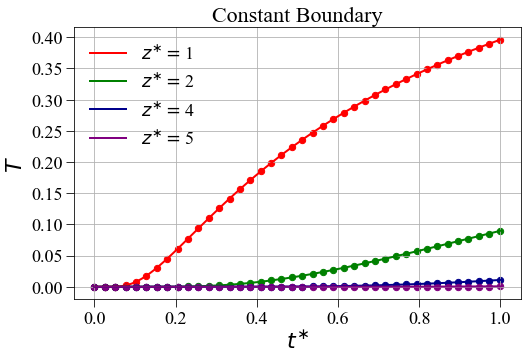

In [11]:
p=1
font = {'fontsize':16*p, 'weight':'normal'}
font2 = {'fontsize':18*p, 'weight':'normal'}
font3 = {'fontsize':22*p, 'weight':'normal'}
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(8,5))
plt.plot(t1.tp,t1.T_const_sol[:,150],color='red',lw=2,ls='-',
         label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[150]))
plt.plot(t1.tp,t1.T_const_sol[:,300],color='green',lw=2,ls='-',
         label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[300]))
plt.plot(t1.tp,t1.T_const_sol[:,450],color='darkblue',lw=2,ls='-',
         label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[450]))
plt.plot(t1.tp,t1.T_const_sol[:,600],color='purple',lw=2,ls='-',
         label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[600]))

plt.scatter(t1.tp[::2000],t1.T_const[::2000,150],color='red',marker = 'o',s=40)
plt.scatter(t1.tp[::2000],t1.T_const[::2000,300],color='green',marker = 'o',s=40)
plt.scatter(t1.tp[::2000],t1.T_const[::2000,450],color='darkblue',marker = 'o',s=40)
plt.scatter(t1.tp[::2000],t1.T_const[::2000,600],color='purple',marker = 'o',s=40)
plt.title('Constant Boundary',**font3)
plt.xticks(**font2)
plt.yticks(**font2)
plt.tick_params(length=8*p)
plt.tick_params(length=5*p,which='minor')
plt.ylabel('$T$',**font3)
plt.xlabel('$t^{\\ast}$',**font3)
plt.legend(loc=0,ncol=1,prop={'size':18*p},frameon=False)
plt.grid()
plt.show()
plt.close()

########################################

# plt.figure(figsize=(10,10))
# plt.plot(t1.tp,t1.T_sol[:,200],color='red',lw=2,ls='-',
#          label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[200]))
# plt.plot(t1.tp,t1.T_sol[:,300],color='green',lw=2,ls='-',
#          label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[300]))
# plt.plot(t1.tp,t1.T_sol[:,450],color='darkblue',lw=2,ls='-',
#          label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[450]))
# plt.plot(t1.tp,t1.T_sol[:,600],color='purple',lw=2,ls='-',
#          label='$z^{\\ast} = $'+'{:1.0f}'.format(t1.zp[600]))

# plt.scatter(t1.tp[10::2000],t1.T[10::2000,200],color='red',marker = 'o',s=40)
# plt.scatter(t1.tp[10::2000],t1.T[10::2000,300],color='green',marker = 'o',s=40)
# plt.scatter(t1.tp[10::2000],t1.T[10::2000,450],color='darkblue',marker = 'o',s=40)
# plt.scatter(t1.tp[10::2000],t1.T[10::2000,600],color='purple',marker = 'o',s=40)
# plt.title('Sinusoidal Boundary',**font3)
# plt.xticks(**font2)
# plt.yticks(**font2)
# plt.tick_params(length=8*p)
# plt.tick_params(length=5*p,which='minor')
# plt.ylabel('$T$',**font3)
# plt.xlabel('$t^{\\ast}$',**font3)
# plt.legend(loc=0,ncol=1,prop={'size':18*p},frameon=False)
# plt.grid()
# plt.show()
# plt.close()

# Physical Results and Discussion

Here we plot the results for both cases of the heat source with the following input parameters to the solver:

* zp=5
* dz=0.008
* zc=1
* cf=0.4
* tp=1
* kappa=1
* omega=15
* T0=1

Note that we cut off the length axis (y-axis) at zp=2 because all the diffusion occurs below this point, and cuts down on computational expense to do so.

For the case of the oscillating boundary condition(s), we first plot the two solutions (numerical and then analtyic) and then show the element-wise difference between the two solutions to see more effectively, where in parameter space the solutions differ and by how much.

### <center> Constant Heat Source

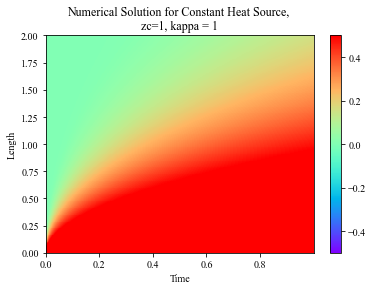

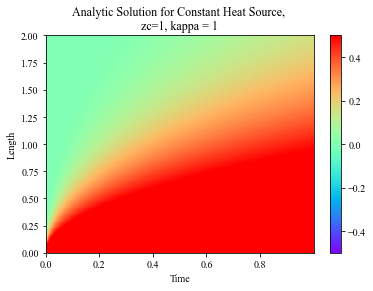

In [12]:
osc_single_num = plt.pcolormesh(t1.t,t1.zp,t1.T_const.T,vmin=-0.5,vmax=0.5, cmap='rainbow',shading='auto')
plt.ylim(0,2)
plt.ylabel('Length'); plt.xlabel('Time')
plt.colorbar()
plt.title( 'Numerical Solution for Constant Heat Source, \n zc={}, kappa = {} '.format(t1.zc,t1.kappa),size=12)
plt.show()
plt.close()

osc_single_an = plt.pcolormesh(t1.t,t1.zp,t1.T_const_sol.T,vmin=-0.5,vmax=0.5, cmap='rainbow',shading='auto')
plt.ylim(0,2)
plt.ylabel('Length'); plt.xlabel('Time')
plt.colorbar()
plt.title('Analytic Solution for Constant Heat Source, \n zc={}, kappa = {} '.format(t1.zc,t1.kappa),size=12)
plt.show()
plt.close()


As we can see, the hot and homogenous heat is smoothed out to zero as time passes, which is clear from both solutions. The heat applied to one boundary spreads throughout the asteroid and in doing so damps out to zero.

### <center> Oscillating Heat Source 

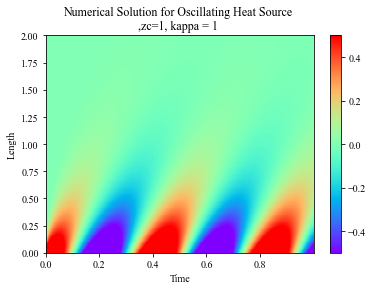

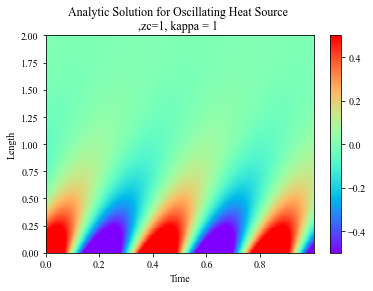

In [13]:
osc_single_num = plt.pcolormesh(t1.t,t1.zp,t1.T.T,vmin=-0.5,vmax=0.5, cmap='rainbow',shading='auto')
plt.ylim(0,2)
plt.ylabel('Length'); plt.xlabel('Time')
plt.colorbar()
plt.title( 'Numerical Solution for Oscillating Heat Source \n,zc={}, kappa = {} '.format(t1.zc,t1.kappa),size=12)
plt.show()
plt.close()

osc_single_an = plt.pcolormesh(t1.t,t1.zp,t1.T_sol.T,vmin=-0.5,vmax=0.5, cmap='rainbow',shading='auto')
plt.ylim(0,2)
plt.ylabel('Length'); plt.xlabel('Time')
plt.colorbar()
plt.title('Analytic Solution for Oscillating Heat Source \n,zc={}, kappa = {} '.format(t1.zc,t1.kappa),size=12)
plt.show()
plt.close()

Here the solutions show how a rotating asteroid experiences alternating hot and cold as one point on the asteroid moves into and out of the Sun. Still, the hot and cold both zero out due to the diffusion.

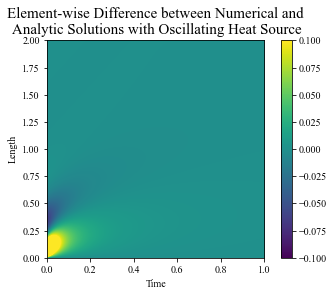

In [14]:
# Compute pixel-by-pixel difference between the above plots

array_diff = np.array([t1.T.T, t1.T_sol.T])
image_diff = np.diff(array_diff, axis=0)
plt.imshow( image_diff.reshape((image_diff.shape[1], image_diff.shape[2])) , aspect=0.5 ,origin='lower',
           vmin=-0.1,vmax=0.1,extent=[0,1,0,2])
plt.title('Element-wise Difference between Numerical and\n Analytic Solutions with Oscillating Heat Source', fontsize=15)
plt.xlabel('Time'); plt.ylabel('Length')
plt.colorbar()

It is only at the very beginning of the diffusion (close to t=0) and very near the boundary (zp=0) where the solutions present minor differences. We can see how small these discrepancies are by examining the colorbar. The two blobs of color- one positive (yellow) and one negative (purple)- indicate that the analytic solution is greater than the numerical solution closest to the boundary when the clock starts and diffusion begins and less than the analytic solution slightly deeper into the asteroid at the same time. We see that these differences themselves diffuse away very early on temporally and also very quickly in the spatial direction. Therefore, we have additional support for the solutions matching within an acceptable level of tolerance and can feel confident that the numerical scheme implemented is correct.

### <center> Adding a New Term: Radiative Loss
    
Now we will compare the numerical solutions to each other: one with radiative loss and one without. When radiative loss is present, it necessarily means that heat can penetrate from one end to the other, and thus the we have to employ the boundary condition wherein the sinusoidal heating comes both ends. 

In [105]:
# t3 = pde_solver(zp=2,dz=0.008,zc=1,cf=0.4,tp=1,kappa=1,omega=15, T0=1,mu=1,k_th=0.1)

# # Compared to t1 = pde_solver(zp=5,dz=0.008,zc=1,cf=0.4,tp=1,kappa=1,omega=15, T0=1,mu=1,k_th=4)

# t2.numerical(double=False)
# t2.numerical_plus_radiative(double=False)

Step size: dt = 1.28e-05


In [112]:
# osc_single_num = plt.pcolormesh(t2.t,t2.zp,t2.T_rad.T, cmap='rainbow',shading='auto')
# plt.ylim(0,2)
# plt.ylabel('Length'); plt.xlabel('Time')
# plt.colorbar()
# plt.title( 'Numerical Solution for Oscillating Heat Source \n with Radiative Term, zc={}, kappa = {} '.format(t2.zc,t2.kappa),size=12)
# plt.show()
# plt.close()

# osc_single_num = plt.pcolormesh(t2.t,t2.zp,t2.T.T, cmap='rainbow',shading='auto')
# plt.ylim(0,2)
# plt.ylabel('Length'); plt.xlabel('Time')
# plt.colorbar()
# plt.title( 'Numerical Solution for Oscillating Heat Source \n (without Radiative Term), zc={}, kappa = {} '.format(t2.zc,t2.kappa),size=12)
# plt.show()
# plt.close()


In [113]:
# array_diff = t2.T_rad.T - t2.T.T
# plt.imshow( array_diff, aspect=0.5 ,origin='lower',
#            extent=[0,1,0,2])
# plt.title('Element-wise Difference between Solutions with Single-side Oscillating Heat Source', fontsize=15)
# plt.xlabel('Time'); plt.ylabel('Length')
# plt.colorbar()

Step size: dt = 1.28e-05


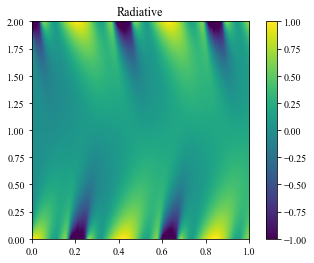

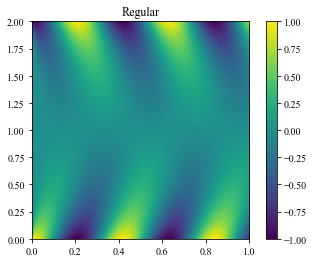

In [110]:
t3 = pde_solver(zp=2,dz=0.008,zc=1,cf=0.4,tp=1,kappa=1,omega=15, T0=1,mu=1,k_th=0.1)

t3.numerical_plus_radiative(double=True)
t3.numerical(double=True)

plt.imshow(t3.T_rad.T, aspect=0.5,vmin=-1,vmax=1,origin='lower',extent=[0,1,0,2])
plt.title('Radiative')
plt.colorbar()
plt.show()
plt.close()

plt.imshow(t3.T.T, aspect=0.5,vmin=-1,vmax=1,origin='lower',extent=[0,1,0,2])
plt.title('Regular')
plt.colorbar()
plt.show()
plt.close()


(250, 78125)


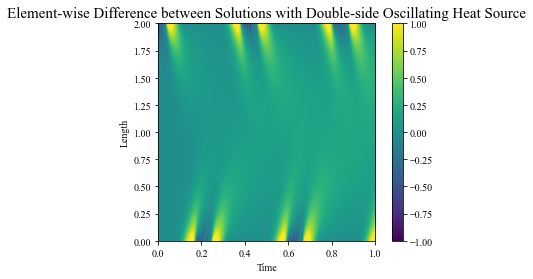

In [111]:
x = t3.T_rad.T - t3.T.T
print(x.shape)
plt.imshow(x, aspect=0.5 ,origin='lower',vmin=-1,vmax=1,extent=[0,1,0,2])
plt.title('Element-wise Difference between Solutions with Double-side Oscillating Heat Source', fontsize=15)
plt.xlabel('Time'); plt.ylabel('Length')
plt.colorbar()

It's clear in this comparison how the radiative term changes the solution from the simple diffusion case. We seem to have more heat that stays at the boundaries rather than moving into the asteroid interior, which makes sense. We can make $\kappa$ smaller and see even starker differences, as heat gets trapped in the asteroid because diffusion is less effective with a smaller diffusion coefficient.

We recognize that it's unphysical for the temperatures to drop below zero; this effect comes from the choice not to introduce a background/ambient temperature, which would have just shifted everything up by that amount.

We also acknowledge that this is a very simplified and idealized problem, thus lacking the complexity of diffusion of heat throughout a real asteroid.